In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy.optimize import minimize, LinearConstraint, NonlinearConstraint
import torch
import torch.nn as nn

from tqdm import tqdm
# Устанавливаем seed для воспроизводимости результатов
np.random.seed(1337)

/tmp/ipykernel_3127115/2570171230.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


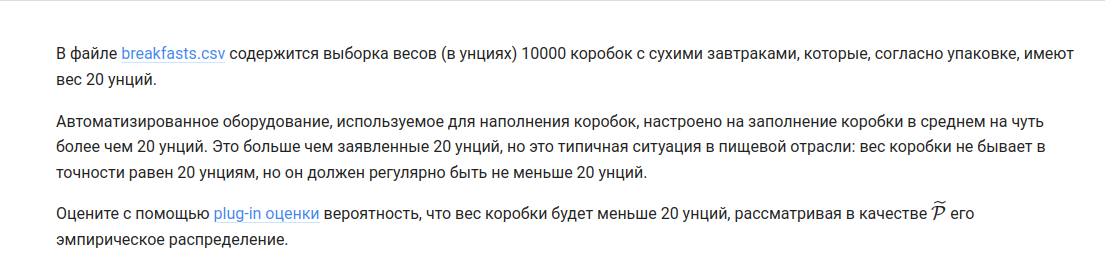

In [4]:
df_breakfasts = pd.read_csv('data_stats_stepic/breakfasts.csv')
df_breakfasts.head(5)

,Unnamed: 0,Weight
0,0,20.440
1,1,20.244
2,2,20.549
3,3,20.755
4,4,20.740


In [5]:
display(df_breakfasts.info())
display(df_breakfasts.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   Weight      10000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 156.4 KB


None

,Unnamed: 0,Weight
count,10000.00000,10000.000000
mean,4999.50000,20.499212
std,2886.89568,0.199874
min,0.00000,19.752000
25%,2499.75000,20.365000
50%,4999.50000,20.500000
75%,7499.25000,20.635000
max,9999.00000,21.171000


In [6]:
less = (df_breakfasts.Weight < 20).sum()
less/len(df_breakfasts)

0.0055

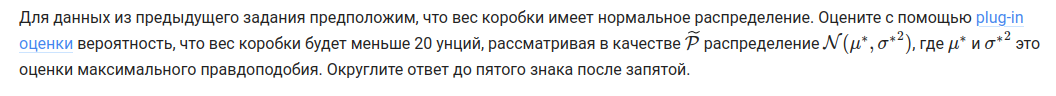

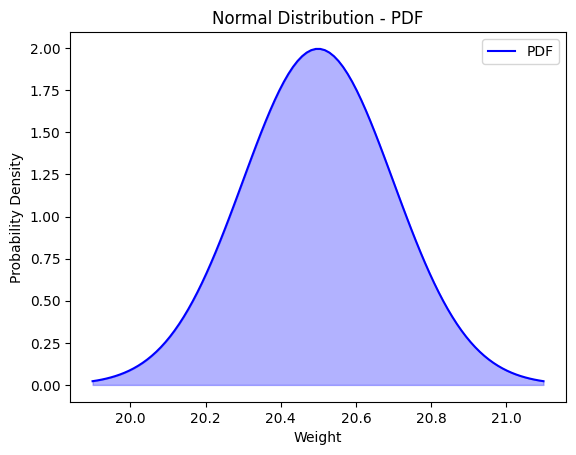

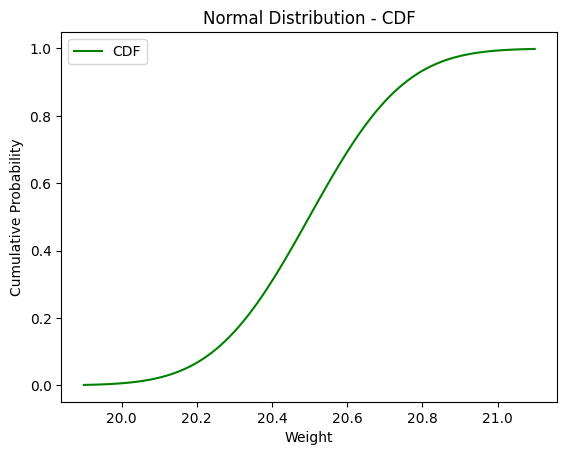

In [28]:
data_mean = df_breakfasts['Weight'].mean()
data_std = df_breakfasts['Weight'].std(ddof=0)

# Create a normal distribution object
norm_dist = ss.norm(loc=data_mean, scale=data_std)

# Generate values for the PDF (Probability Density Function)
x_values = np.linspace(data_mean - 3*data_std, data_mean + 3*data_std, 100)
pdf_values = norm_dist.pdf(x_values)  # PDF values for the generated x values

# Generate values for the CDF (Cumulative Distribution Function)
cdf_values = norm_dist.cdf(x_values)  # CDF values for the generated x values

# Plot the PDF (Probability Density Function)

plt.plot(x_values, pdf_values, label='PDF', color='blue')
plt.fill_between(x_values, pdf_values, alpha=0.3, color='blue')  # Fill area under the PDF curve
plt.title('Normal Distribution - PDF')
plt.xlabel('Weight')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()

# Plot the CDF (Cumulative Distribution Function)

plt.plot(x_values, cdf_values, label='CDF', color='green')
plt.title('Normal Distribution - CDF')
plt.xlabel('Weight')
plt.ylabel('Cumulative Probability')
plt.legend()

# Show the plot
plt.show()

In [29]:
norm_dist.cdf(20)

0.006249097896661131

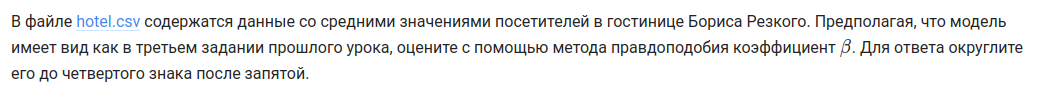
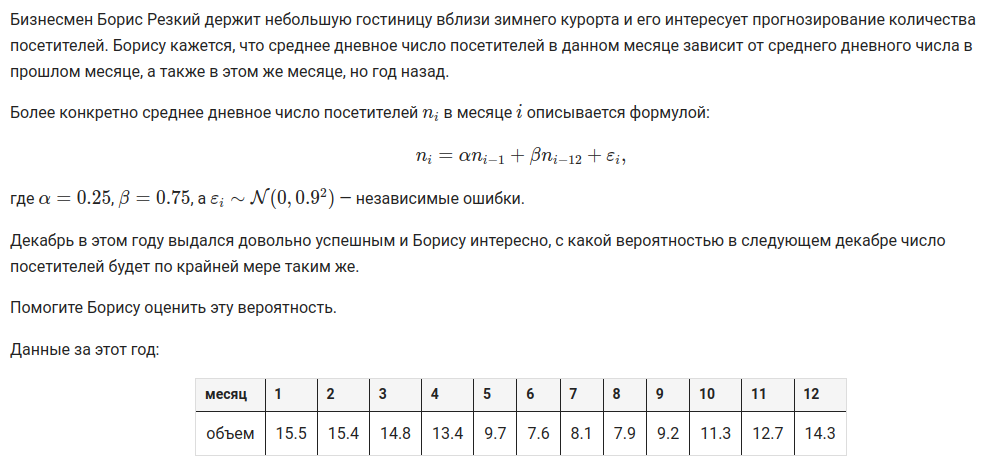

In [293]:
df_hotels = pd.read_csv('data_stats_stepic/hotel.csv', index_col=0)
df_hotels.head(5)

,year,month,curr_month,prev_month,1_year_ago
0,2013,1,16.516129,13.677419,17.774194
1,2013,2,15.964286,16.516129,17.678571
2,2013,3,14.967742,15.964286,13.483871
3,2013,4,11.433333,14.967742,12.433333
4,2013,5,9.645161,11.433333,9.516129


In [294]:
display(df_hotels.info())
display(df_hotels.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        108 non-null    int64  
 1   month       108 non-null    int64  
 2   curr_month  108 non-null    float64
 3   prev_month  108 non-null    float64
 4   1_year_ago  108 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 5.1 KB


None

,year,month,curr_month,prev_month,1_year_ago
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,2017.000000,6.500000,11.161206,11.155232,11.150690
std,2.594026,3.468146,3.086903,3.081347,3.150372
min,2013.000000,1.000000,4.741935,4.741935,4.741935
25%,2015.000000,3.750000,8.483333,8.483333,8.483333
50%,2017.000000,6.500000,11.096774,11.096774,10.790323
75%,2019.000000,9.250000,13.879032,13.798387,13.701613
max,2021.000000,12.000000,16.785714,16.785714,17.774194


In [295]:
sample_size = len(df_hotels)
alpha = 0.25
beta = 0.75
sigma = 0.9

error = ss.norm(0, sigma)

In [324]:
df_hotels['curr_month_pred'] = df_hotels.apply(lambda row: alpha*row['prev_month'] + beta*row['1_year_ago'] + error.rvs(1)[0], axis=1)
df_hotels

,year,month,curr_month,prev_month,1_year_ago,curr_month_pred
0,2013,1,16.516129,13.677419,17.774194,16.992069
1,2013,2,15.964286,16.516129,17.678571,17.825361
2,2013,3,14.967742,15.964286,13.483871,13.875393
3,2013,4,11.433333,14.967742,12.433333,13.196658
4,2013,5,9.645161,11.433333,9.516129,10.010946
...,...,...,...,...,...,...
103,2021,8,7.903226,8.129032,6.838710,7.840779
104,2021,9,9.233333,7.903226,8.500000,9.589318
105,2021,10,11.322581,9.233333,9.838710,9.730232
106,2021,11,12.666667,11.322581,12.800000,11.932664


In [223]:
class HotelRegression(nn.Module):
    def __init__(self):
        super(HotelRegression, self).__init__()
        self.nn_alpha = nn.Parameter(data=torch.tensor([alpha]), requires_grad=False)
        self.nn_beta = nn.Parameter(data=torch.tensor([0.5]))

    def forward(self, nn_prev_month, nn_year_ago, nn_error):
        return self.nn_alpha*nn_prev_month + self.nn_beta*nn_year_ago + nn_error

In [224]:
nn_curr_month = torch.tensor(df_hotels['curr_month'])
nn_prev_month = torch.tensor(df_hotels['prev_month'])
nn_year_ago = torch.tensor(df_hotels['1_year_ago'])
nn_error = torch.tensor(error.rvs(len(df_hotels)))

In [225]:
model = HotelRegression()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)  
criterion = nn.MSELoss()

In [226]:
N = 1_000

beta_result = []

for n in tqdm(range(N)):
    nn_error = torch.tensor(error.rvs(len(df_hotels)))
    model = HotelRegression()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)  
    criterion = nn.MSELoss()

    num_epochs = 100

    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(nn_prev_month, nn_year_ago, nn_error)
        
        # Compute loss
        loss = criterion(outputs, nn_curr_month)
        
        # Zero gradients
        optimizer.zero_grad()
        
        # Backward pass (compute gradients)
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        # Print progress
        # if (epoch+1) % 100 == 0:
        #     print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
            
    beta_result.append(model.nn_beta.detach().cpu().numpy()[0])
np.mean(beta_result)

100%|██████████| 1000/1000 [00:12<00:00, 81.46it/s]


In [260]:
curr_month = df_hotels['curr_month'].to_numpy()
prev_month = df_hotels['prev_month'].to_numpy()
year_ago = df_hotels['1_year_ago'].to_numpy()
# err = error.rvs(len(df_hotels))

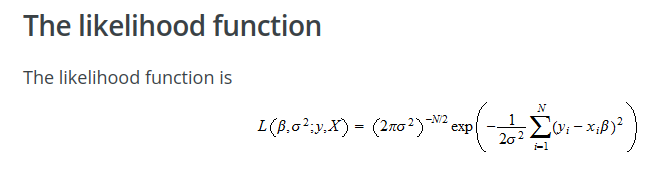

In [270]:
(2*np.pi*sigma)**(-sample_size/2)*np.exp((-1/(2*sigma)) * np.mean((curr_month - (alpha*prev_month + beta*year_ago))**2))

1.061151227032904e-41

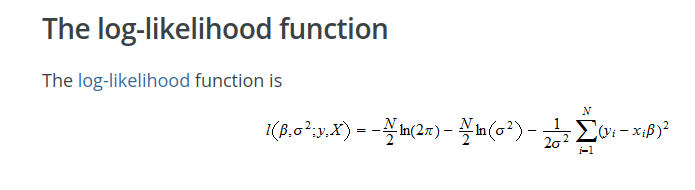

In [278]:
-sample_size/2*np.log2(2*np.pi) - -sample_size/2*np.log2(sigma) - (1/(2*sigma))*np.sum((curr_month - (alpha*prev_month + beta*year_ago))**2)

-236.78895257387677

In [327]:
from scipy.optimize import minimize

N = 1_000

beta_result = []

for n in tqdm(range(N)):

    def log_likelihood(x, curr_month, prev_month, year_ago, err):
        alpha = x[0]
        beta = x[1]
        likelihood = -sample_size/2*np.log(2*np.pi) - sample_size/2*np.log(sigma) - (1/(2*sigma))*np.sum((curr_month - (alpha*prev_month + beta*year_ago))**2)
        return -likelihood
        # return np.mean((curr_month - (alpha*prev_month + beta*year_ago + err))**2)

    # err = error.rvs(len(df_hotels))
    params = np.array([0.5, 0.5])
    initial_beta = 0.0001  # начнем с какого-то значения

    # Оценка параметра beta с помощью метода максимального правдоподобия
    result = minimize(log_likelihood, params, args=(curr_month, prev_month, year_ago, err))
    beta_result.append(result['x'][1])
np.mean(beta_result)

100%|██████████| 1000/1000 [00:01<00:00, 997.12it/s]


0.7455267727269632

In [329]:
import numpy as np 
import pandas as pd 

hotels = pd.read_csv('data_stats_stepic/hotel.csv') 
X = hotels[['prev_month', '1_year_ago']].values 
y = hotels.curr_month 
w = np.linalg.inv(X.transpose() @ X) @ X.transpose() @ np.array(y) 
print(w)

[0.25180659 0.74552679]


<Axes: >

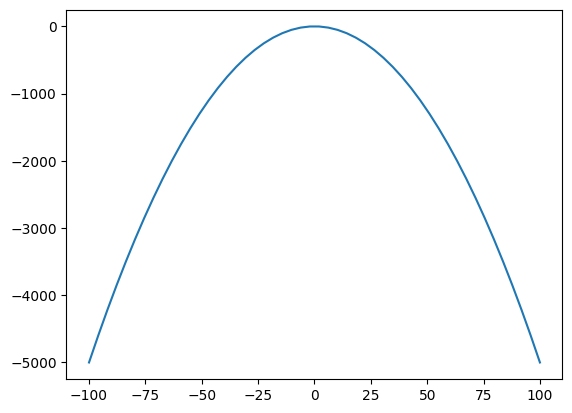

In [340]:
x_values = np.linspace(-100, 100)
y_values = ss.norm.logpdf(x_values)
sns.lineplot(x=x_values, y=y_values)

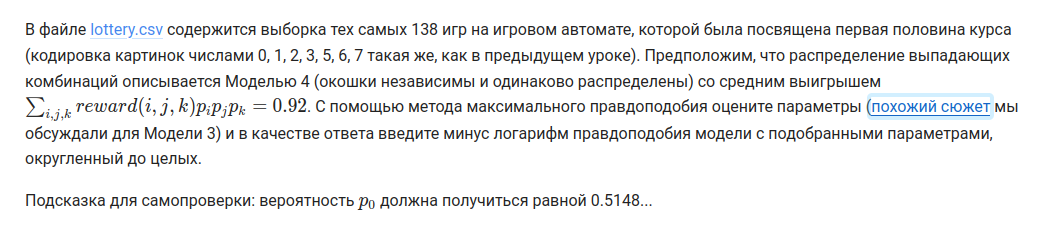

In [12]:
df_lottery = pd.read_csv('data_stats_stepic/lottery.csv', index_col=0)
df_lottery

,1,2,3,reward
0,2,0,0,0
1,0,5,1,0
2,0,0,0,0
3,2,0,0,0
4,0,0,0,0
...,...,...,...,...
133,7,1,1,0
134,7,1,0,0
135,1,0,1,0
136,0,0,0,0


In [13]:
df_lottery.apply(lambda row: tuple(sorted((row['1'], row['2'], row['3']))), axis=1)
reward_table = {}
for index, row in df_lottery.iterrows():
    combination = tuple(sorted((row['1'], row['2'], row['3'])))
    reward = row['reward']
    reward_table[combination] = reward
reward_table

{(0, 0, 2): 0,
 (0, 1, 5): 0,
 (0, 0, 0): 0,
 (0, 0, 1): 0,
 (0, 1, 1): 0,
 (1, 1, 2): 5,
 (2, 2, 7): 0,
 (0, 0, 7): 0,
 (0, 1, 6): 2,
 (0, 1, 7): 0,
 (0, 1, 2): 0,
 (0, 1, 3): 0,
 (1, 1, 3): 5,
 (0, 2, 3): 0,
 (0, 3, 3): 0,
 (0, 2, 2): 0,
 (3, 5, 7): 0,
 (0, 2, 5): 0,
 (0, 0, 5): 0,
 (0, 3, 5): 0,
 (0, 2, 6): 2,
 (1, 2, 2): 5,
 (1, 2, 3): 5,
 (0, 0, 3): 0,
 (0, 2, 7): 0,
 (1, 2, 7): 0,
 (1, 1, 7): 0}

In [34]:
from itertools import combinations, combinations_with_replacement

# Example list of elements
elements = [0,1,2,3,5,6,7]

# Generate all combinations of length 2
picture_combinations = list(combinations_with_replacement(elements, 3))


In [51]:
def log_likelihood(picture_prob):
    expected_reward = 0

    for picture_combination in picture_combinations:
        reward = reward_table.get(picture_combination, 0)
        i, j, k = picture_combination
        if i > 4:
            i -= 1
        if j > 4:
            j -= 1
        if k > 4:
            k -= 1
        
        expected_reward += reward*picture_prob[i]*picture_prob[j]*picture_prob[k]
                    
    return expected_reward

picture_prob = pd.melt(df_lottery, value_vars=['1', '2', '3'], value_name='value')['value'].value_counts(normalize=True).sort_index()
picture_prob = picture_prob.to_numpy()

constr1 = LinearConstraint(np.ones(7), 1, 1)
constr2 = NonlinearConstraint(log_likelihood, 0.92, 0.92)

params = picture_prob

bounds=[(0.0001, None) for _ in range(7)]

result = minimize(log_likelihood, params, bounds=bounds, constraints=[constr1, constr2])
result

/home/user/.venv/sharedenv/lib/python3.10/site-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


 message: Iteration limit reached
 success: False
  status: 9
     fun: 0.9197819377087895
       x: [ 5.153e-01  2.304e-01  1.019e-01  4.797e-02  7.037e-02
            3.299e-03  3.073e-02]
     nit: 100
     jac: [ 1.189e-02  2.987e+00  2.813e+00  2.445e+00  2.241e+01
            2.080e+00  2.512e+00]
    nfev: 1088
    njev: 98

In [99]:
x = result['x']
x.sum()


1.0000000000000002

In [100]:
log_likelihood(x)

0.9197819377087895

In [92]:
np.log((x[0]**221)*(x[1]**96)*(x[2]**44)*(x[3]**23)*(x[4]**9)*(x[5]**4)*(x[6]**17)),np.log((x[0])*(x[1])*(x[2])*(x[3])*(x[4])*(x[5])*(x[6]))

-18.275086383452294

In [102]:
import numpy as np
import pandas as pd

data = pd.read_csv('data_stats_stepic/lottery.csv', index_col=0)

table = {(0, 0, 0): 0,
         (0, 0, 1): 0,
         (0, 0, 2): 0,
         (0, 0, 3): 0,
         (0, 0, 5): 0,
         (0, 0, 6): 2,
         (0, 0, 7): 0,
         (0, 1, 1): 0,
         (0, 1, 2): 0,
         (0, 1, 3): 0,
         (0, 1, 5): 0,
         (0, 1, 6): 2,
         (0, 1, 7): 0,
         (0, 2, 2): 0,
         (0, 2, 3): 0,
         (0, 2, 5): 0,
         (0, 2, 6): 2,
         (0, 2, 7): 0,
         (0, 3, 3): 0,
         (0, 3, 5): 0,
         (0, 3, 6): 2,
         (0, 3, 7): 0,
         (0, 5, 5): 0,
         (0, 5, 6): 10,
         (0, 5, 7): 0,
         (0, 6, 6): 5,
         (0, 6, 7): 2,
         (0, 7, 7): 0,
         (1, 1, 1): 10,
         (1, 1, 2): 5,
         (1, 1, 3): 5,
         (1, 1, 5): 20,
         (1, 1, 6): 2,
         (1, 1, 7): 0,
         (1, 2, 2): 5,
         (1, 2, 3): 5,
         (1, 2, 5): 10,
         (1, 2, 6): 2,
         (1, 2, 7): 0,
         (1, 3, 3): 5,
         (1, 3, 5): 10,
         (1, 3, 6): 2,
         (1, 3, 7): 0,
         (1, 5, 5): 40,
         (1, 5, 6): 10,
         (1, 5, 7): 0,
         (1, 6, 6): 5,
         (1, 6, 7): 2,
         (1, 7, 7): 0,
         (2, 2, 2): 25,
         (2, 2, 3): 5,
         (2, 2, 5): 50,
         (2, 2, 6): 2,
         (2, 2, 7): 0,
         (2, 3, 3): 5,
         (2, 3, 5): 10,
         (2, 3, 6): 2,
         (2, 3, 7): 0,
         (2, 5, 5): 100,
         (2, 5, 6): 10,
         (2, 5, 7): 0,
         (2, 6, 6): 5,
         (2, 6, 7): 2,
         (2, 7, 7): 0,
         (3, 3, 3): 40,
         (3, 3, 5): 80,
         (3, 3, 6): 2,
         (3, 3, 7): 0,
         (3, 5, 5): 160,
         (3, 5, 6): 10,
         (3, 5, 7): 0,
         (3, 6, 6): 5,
         (3, 6, 7): 2,
         (3, 7, 7): 0,
         (5, 5, 5): 1000,
         (5, 5, 6): 40,
         (5, 5, 7): 320,
         (5, 6, 6): 20,
         (5, 6, 7): 10,
         (5, 7, 7): 160,
         (6, 6, 6): 10,
         (6, 6, 7): 5,
         (6, 7, 7): 2,
         (7, 7, 7): 80}

from itertools import product
M = np.array([table[tuple(sorted(x))] for x in product([0, 1, 2, 3, 5, 6, 7], repeat=3)]).reshape((7, 7, 7))

from scipy.optimize import minimize, LinearConstraint, NonlinearConstraint
def logL(x):
    return -np.sum([(data[['1', '2', '3']] == i).sum().sum() * np.log(p) for i, p in zip([0, 1, 2, 3, 5, 6, 7], x)])

constr1 = LinearConstraint(np.ones(7), 1, 1)

def fun_constr2(x):
    return np.tensordot(x, np.tensordot(x, np.tensordot(x, M, (0, 0)), (0, 0)), (0, 0))

constr2 = NonlinearConstraint(fun_constr2, 0.92, 0.92)

res = minimize(logL,
               x0=[1/2, 1/4, 1/8, 1/16, 1/64, 1/64, 1/32],
               bounds=[(0.00001, 1) for _ in range(7)],
               constraints=[constr1, constr2])
print(res.fun)

/home/user/.venv/sharedenv/lib/python3.10/site-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
/home/user/.venv/sharedenv/lib/python3.10/site-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
/home/user/.venv/sharedenv/lib/python3.10/site-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
/home/user/.venv/sharedenv/lib/python3.10/site-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
/home/user/.venv/sharedenv/lib/python3.10/site-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapp

552.0360735844127


In [98]:
[(data[['1', '2', '3']] == i).sum().sum() * np.log(p) for i, p in zip([0, 1, 2, 3, 5, 6, 7], x)]

[-146.7073590571745,
 -137.70959795322037,
 -97.21152899008432,
 -65.83443822938395,
 -31.95141731111211,
 -18.275086383452294,
 -54.34664565997253]

In [103]:
logL(x)

563.7171583398707

In [79]:
x = res.x
x

array([0.51487342, 0.23824041, 0.10977166, 0.05713337, 0.02872012,
       0.01037069, 0.04089034])

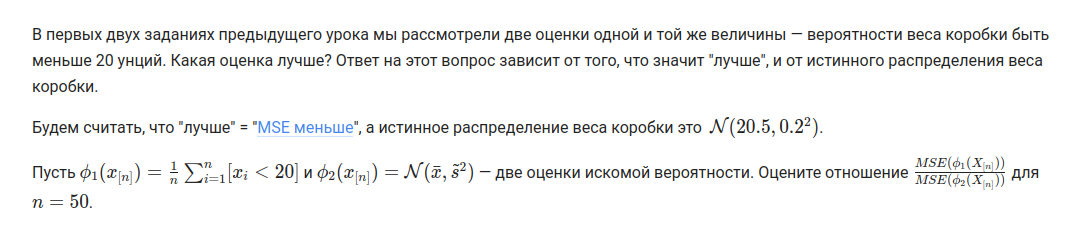

In [560]:
n = 50
N = 100_000

In [551]:
truth_dist = ss.norm(loc=20.5, scale=0.2)
# truth_dist = ss.t(3, loc=20.5, scale=0.2/ss.t(3).std())
thuth_prob = truth_dist.cdf(20)
thuth_prob

0.006209665325776132

In [530]:
df_breakfasts = pd.read_csv('data_stats_stepic/breakfasts.csv', index_col=0)
df_breakfasts.head(5)

,Weight
0,20.440
1,20.244
2,20.549
3,20.755
4,20.740


In [531]:
weight = df_breakfasts['Weight'].to_numpy()

In [579]:
norm_dist = ss.norm(loc=weight.mean(), scale=weight.std(ddof=0))

In [622]:
# boot = np.array([np.random.choice(weight, size=n) for _ in range(N)])
boot = truth_dist.rvs(size=(N, n))

In [640]:
phi_1 = np.mean(boot < 20, axis=1)

In [641]:
phi_2 = np.zeros(N)
for i, arr in tqdm(enumerate(boot), total=N):
    prob = ss.norm(loc=arr.mean(), scale=arr.std(ddof=0)).cdf(20)
    phi_2[i] = prob
phi_2

100%|██████████| 100000/100000 [00:46<00:00, 2157.89it/s]


array([0.00965066, 0.00210945, 0.00669852, ..., 0.00392682, 0.00660512,
       0.00602076])

In [585]:
phi_2 = (norm_dist.rvs(size=(N, n)) < 20).mean(1)

In [630]:
phi1_mse = phi_1.std()**2 + (phi_1.mean() - thuth_prob)**2
phi1_mse

0.00012462102963284546

In [631]:
phi2_mse = phi_2.std()**2 + (phi_2.mean() - thuth_prob)**2
phi2_mse

2.908964729055833e-05

In [642]:
phi1_mse = ((phi_1 - thuth_prob)**2).mean()
phi2_mse = ((phi_2 - thuth_prob)**2).mean()
phi1_mse, phi2_mse

(0.0001246210296328455, 2.9089647290558327e-05)

In [633]:
phi_1.mean(), phi_2.mean()

(0.006230200000000001, 0.006863840538727882)

In [634]:
phi_1.std(), phi_2.std()

(0.011163360065858307, 0.0053536624922867395)

In [619]:
(phi_1.mean() - thuth_prob), (phi_2.mean() - thuth_prob)

(-0.0007580653257761322, 0.0006800334080458723)

In [632]:
# display(np.sqrt(phi1_mse)/np.sqrt(phi2_mse))
display((phi1_mse)/(phi2_mse))

4.284033710965409

In [249]:
a = 2*(ss.uniform().rvs(size=(20_000,25)).mean(1))
b = (ss.uniform().rvs(size=(20_000,25)).max(1))

<Axes: ylabel='Count'>

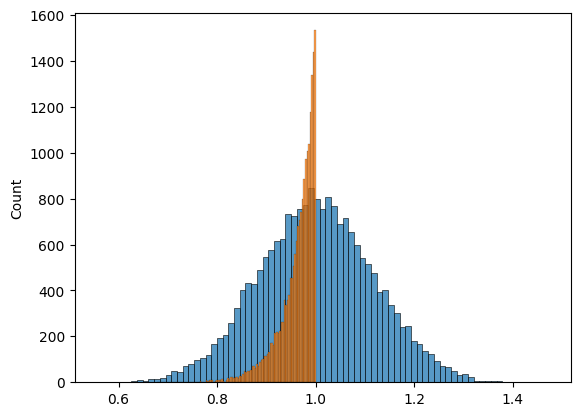

In [251]:
sns.histplot(a)
sns.histplot(b)

In [294]:
display(np.sqrt(a.std()**2 + (a.mean()-1)**2))
display(np.sqrt(b.std()**2 + (b.mean()-1)**2))

0.11648852728484402

0.05333024215377162

In [349]:
np.sqrt(np.mean((b-1)**2))

0.0533302421537717

In [647]:
import numpy as np
import pandas as pd
import scipy.stats as ss

# Истинные параметры распределения
mu = 20.5
sigma = 0.2
n = 50

# Истинная вероятность
true_p = ss.norm(mu, sigma).cdf(20)

# Функция для оценки phi_1
def phi_1(X):
    return np.mean(X < 20)

# Функция для оценки phi_2
def phi_2(X):
    X_bar = np.mean(X)
    s = np.std(X, ddof=0)
    return ss.norm.cdf((20 - X_bar) / s)

# Сгенерируем много выборок и посчитаем MSE для каждой оценки
np.random.seed(0)
num_samples = 100000
phi_1_estimates = np.zeros(num_samples)
phi_2_estimates = np.zeros(num_samples)

for i in range(num_samples):
    sample = np.random.normal(mu, sigma, n)
    phi_1_estimates[i] = phi_1(sample)
    phi_2_estimates[i] = phi_2(sample)

mse_phi_1 = np.mean((phi_1_estimates - true_p) ** 2)
mse_phi_2 = np.mean((phi_2_estimates - true_p) ** 2)

# Отношение MSE
mse_ratio = mse_phi_1 / mse_phi_2
print(mse_ratio)


4.203515529169539


In [656]:
import numpy as np
import scipy.stats as ss

# truth_dist = ss.norm(20.5, 0.2)
truth_dist = ss.t(3, loc=20.5, scale=0.2/ss.t(3).std())
sample = truth_dist.rvs(size=(1000000, 50))
d = 20
q = truth_dist.cdf(d)
q1 = (sample < d).mean(axis=1)
q2 = ss.norm.cdf(d, loc=sample.mean(axis=1), scale=sample.std(ddof=0, axis=1))
print(np.mean((q1 - q) ** 2) / np.mean((q2 - q) ** 2))

0.4078964602966814


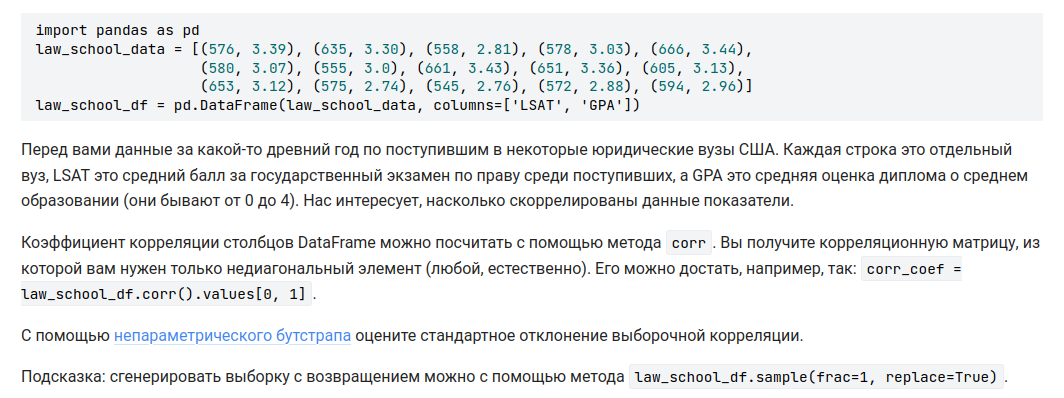

In [53]:
N = 100_000

law_school_data = [(576, 3.39), (635, 3.30), (558, 2.81), (578, 3.03), (666, 3.44),
                   (580, 3.07), (555, 3.0), (661, 3.43), (651, 3.36), (605, 3.13),
                   (653, 3.12), (575, 2.74), (545, 2.76), (572, 2.88), (594, 2.96)]
law_school_df = pd.DataFrame(law_school_data, columns=['LSAT', 'GPA'])
law_school_df

,LSAT,GPA
0,576,3.39
1,635,3.30
2,558,2.81
3,578,3.03
4,666,3.44
5,580,3.07
6,555,3.00
7,661,3.43
8,651,3.36
9,605,3.13


In [4]:
law_school_df.corr().values[0, 1]

,LSAT,GPA
LSAT,1.000000,0.776374
GPA,0.776374,1.000000


In [59]:
boot = np.array([law_school_df.sample(frac=1, replace=True).corr().values[0, 1] for _ in tqdm(range(N))])

100%|██████████| 100000/100000 [00:11<00:00, 8989.55it/s]


In [60]:
boot.std()

0.13357426817923163

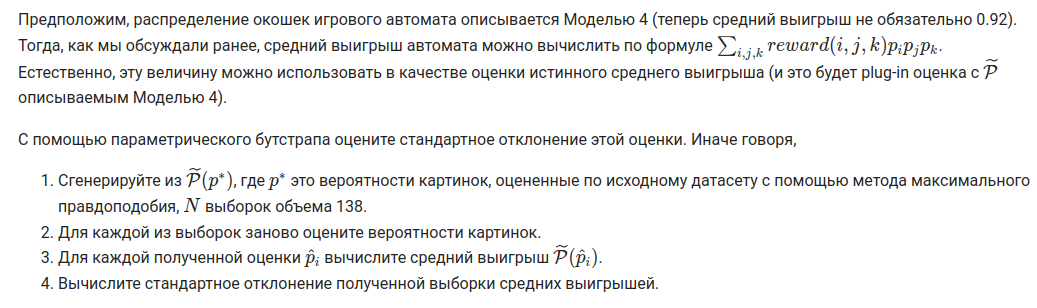

In [56]:
import warnings
from scipy.optimize import minimize, LinearConstraint
from itertools import product

warnings.filterwarnings("ignore", category=RuntimeWarning, module="scipy.optimize._slsqp_py")

data = pd.read_csv('data_stats_stepic/lottery.csv', index_col=0)

table = {(0, 0, 0): 0,
         (0, 0, 1): 0,
         (0, 0, 2): 0,
         (0, 0, 3): 0,
         (0, 0, 5): 0,
         (0, 0, 6): 2,
         (0, 0, 7): 0,
         (0, 1, 1): 0,
         (0, 1, 2): 0,
         (0, 1, 3): 0,
         (0, 1, 5): 0,
         (0, 1, 6): 2,
         (0, 1, 7): 0,
         (0, 2, 2): 0,
         (0, 2, 3): 0,
         (0, 2, 5): 0,
         (0, 2, 6): 2,
         (0, 2, 7): 0,
         (0, 3, 3): 0,
         (0, 3, 5): 0,
         (0, 3, 6): 2,
         (0, 3, 7): 0,
         (0, 5, 5): 0,
         (0, 5, 6): 10,
         (0, 5, 7): 0,
         (0, 6, 6): 5,
         (0, 6, 7): 2,
         (0, 7, 7): 0,
         (1, 1, 1): 10,
         (1, 1, 2): 5,
         (1, 1, 3): 5,
         (1, 1, 5): 20,
         (1, 1, 6): 2,
         (1, 1, 7): 0,
         (1, 2, 2): 5,
         (1, 2, 3): 5,
         (1, 2, 5): 10,
         (1, 2, 6): 2,
         (1, 2, 7): 0,
         (1, 3, 3): 5,
         (1, 3, 5): 10,
         (1, 3, 6): 2,
         (1, 3, 7): 0,
         (1, 5, 5): 40,
         (1, 5, 6): 10,
         (1, 5, 7): 0,
         (1, 6, 6): 5,
         (1, 6, 7): 2,
         (1, 7, 7): 0,
         (2, 2, 2): 25,
         (2, 2, 3): 5,
         (2, 2, 5): 50,
         (2, 2, 6): 2,
         (2, 2, 7): 0,
         (2, 3, 3): 5,
         (2, 3, 5): 10,
         (2, 3, 6): 2,
         (2, 3, 7): 0,
         (2, 5, 5): 100,
         (2, 5, 6): 10,
         (2, 5, 7): 0,
         (2, 6, 6): 5,
         (2, 6, 7): 2,
         (2, 7, 7): 0,
         (3, 3, 3): 40,
         (3, 3, 5): 80,
         (3, 3, 6): 2,
         (3, 3, 7): 0,
         (3, 5, 5): 160,
         (3, 5, 6): 10,
         (3, 5, 7): 0,
         (3, 6, 6): 5,
         (3, 6, 7): 2,
         (3, 7, 7): 0,
         (5, 5, 5): 1000,
         (5, 5, 6): 40,
         (5, 5, 7): 320,
         (5, 6, 6): 20,
         (5, 6, 7): 10,
         (5, 7, 7): 160,
         (6, 6, 6): 10,
         (6, 6, 7): 5,
         (6, 7, 7): 2,
         (7, 7, 7): 80}

N = 10_000
n = 138

M = np.array([table[tuple(sorted(x))] for x in product([0, 1, 2, 3, 5, 6, 7], repeat=3)]).reshape((7, 7, 7))

def average_returns(x):
    return np.tensordot(x, np.tensordot(x, np.tensordot(x, M, (0, 0)), (0, 0)), (0, 0))

def minimize_probs(data):
    def logL(x, data):
        return -np.sum([(data== i) * np.log(p) for i, p in zip([0, 1, 2, 3, 5, 6, 7], x)])

    constr1 = LinearConstraint(np.ones(7), 1, 1)
    res = minimize(logL,
                args=(data, ),
                x0=[1/2, 1/4, 1/8, 1/16, 1/64, 1/64, 1/32],
                bounds=[(0.00001, 1) for _ in range(7)],
                constraints=[constr1])
    return res.x

# probs = minimize_probs(data[['1', '2', '3']].to_numpy())
dist = ss.rv_discrete(values=([0, 1, 2, 3, 5, 6, 7], probs))
samples = dist.rvs(size=(N, n, 3))

result = []
for sample_n in tqdm(range(N)):
    probs = minimize_probs(samples[sample_n])
    result.append(average_returns(probs).item())
print(np.std(result))

100%|██████████| 10000/10000 [01:09<00:00, 143.40it/s]

0.20729862034432286


<Axes: ylabel='Count'>

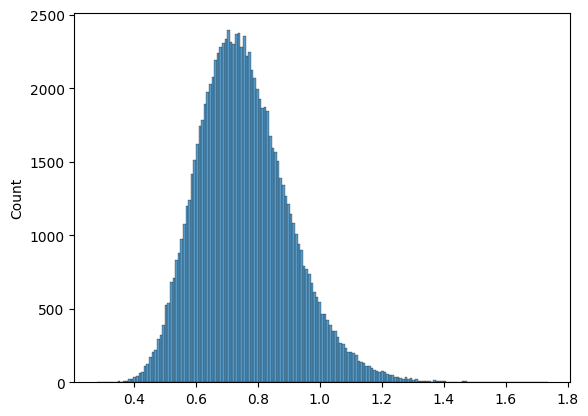

In [36]:
sns.histplot(result)